## Motivation

Understanding the results of the STP is not straightforward and requires a grasp of the module equation. To simplify this, I will attempt to demonstrate the results using basic operations, eliminating the need to read the module equation.


I will use the example to show.

ASSERT( Q_13 = 0x3C );ASSERT( Q_4 = 0x33 );ASSERT( X_2 = 0x55 );ASSERT( T_5 = 0x77 );ASSERT( Q_0 = 0x0F );ASSERT( Q_1 = 0x33 );ASSERT( Q_2 = 0x55 );ASSERT( B_2 = 0x04 );ASSERT( Q_5 = 0x3C );ASSERT( Q_6 = 0x55 );ASSERT( Q_7 = 0x30 );ASSERT(Q_8 = 0x05);
ASSERT( Q_12 = 0x77 );ASSERT( Q_3 = 0x0F );ASSERT( X_0 = 0x0F );ASSERT( T_2 = 0x30 );ASSERT( T_1 = 0x05 );ASSERT( B_0 = 0x02 );ASSERT( Y_0 = 0x4B );ASSERT( X_1 = 0x33 );
ASSERT( B_5 = 0x06 );ASSERT( Q_10 = 0x55 );ASSERT( Y_1 = 0x39 );ASSERT( B_6 = 0x02 );
ASSERT( B_4 = 0x02 );ASSERT( T_6 = 0x4B );ASSERT( B_3 = 0x02 );ASSERT( T_4 = 0x39 );ASSERT( B_1 = 0x04 );ASSERT( T_3 = 0x65 );ASSERT( T_0 = 0x3C );ASSERT( Q_9 = 0x3C );
ASSERT( Q_11 = 0x33 );ASSERT( Y_2 = 0x65 );
Invalid.
081.35557174682617


In [1]:
# extract target variables from a result file
result_file_str = "result.txt"
lines = None

# Open the file
with open(result_file_str, "r") as result_file:
    lines = result_file.readlines()

# Initialize an empty dictionary
variables = {}

for line in lines:
    # Only process lines that start with 'ASSERT'
    if line.startswith("ASSERT"):
        # Remove the 'ASSERT( ' and ' );' parts from the line
        line = line.replace("ASSERT( ", "").replace(" );", "")

        # Split the line at the '=' sign
        var, value = line.split(" = ")

        # Remove the newline character from the value
        value = value.strip()

        # Add the variable and its value to the dictionary
        variables[var] = value

print(variables)

{'Q_24': '0x7F7F', 'Q_5': '0x00FF', 'Q_4': '0x9999', 'Q_3': '0x6666', 'Q_1': '0x5555', 'Q_13': '0x6666', 'T_11': '0x7F7F', 'Q_14': '0x9999', 'Q_16': '0x3333', 'Q_17': '0x5533', 'Q_18': '0x7733', 'Q_19': '0xCCAA', 'T_17': '0x0114', 'Q_20': '0x6969', 'Q_22': '0x7F7B', 'Q_23': '0x0F0F', 'Q_26': '0x0F0F', 'Q_21': '0x7733', 'B_18': '0x0002', 'T_13': '0x7074', 'Q_28': '0x9999', 'Q_7': '0x5555', 'B_0': '0x0002', 'Q_9': '0x0F0F', 'Q_31': '0xCF50', 'Y_0': '0x3B19', 'Q_12': '0x0F0F', 'B_9': '0x0002', 'B_3': '0x0002', 'Q_6': '0x99FF', 'T_14': '0xFFFF', 'T_12': '0x3B19', 'T_10': '0x7F7B', 'X_0': '0x00FF', 'B_17': '0x0004', 'Y_3': '0x7174', 'T_1': '0x9999', 'B_2': '0x0006', 'T_0': '0x6666', 'B_15': '0x0002', 'B_1': '0x0003', 'Y_2': '0x5707', 'T_3': '0xCCAA', 'B_14': '0x0002', 'B_16': '0x0004', 'B_7': '0x0002', 'T_6': '0x6969', 'X_2': '0x3333', 'B_10': '0x0006', 'Q_15': '0xCCAA', 'Q_29': '0x6666', 'B_8': '0x0006', 'X_3': '0x5555', 'B_11': '0x0006', 'Q_2': '0x00FF', 'B_6': '0x0002', 'Q_38': '0x7074',

In [2]:
import re

# Initialize empty dictionaries
arrays = {}

# Iterate over each item in the dictionary
for key, value in variables.items():
    # Get the first character of the key
    first_char = key[0]

    # Get the last number in the key using regex
    match = re.search(r"\d+$", key)
    if match:
        last_number = int(match.group())

        # If this character doesn't have an array yet, create it
        if first_char not in arrays:
            arrays[first_char] = {}

        # Add the value to the appropriate array at the position specified by the last number
        arrays[first_char][last_number] = value

# Sort each array by its keys (the last numbers in the original keys)
for key in arrays:
    arrays[key] = [item[1] for item in sorted(arrays[key].items())]

print(arrays)

{'Q': ['0x3333', '0x5555', '0x00FF', '0x6666', '0x9999', '0x00FF', '0x99FF', '0x5555', '0xCCAA', '0x0F0F', '0x00FF', '0xCFAF', '0x0F0F', '0x6666', '0x9999', '0xCCAA', '0x3333', '0x5533', '0x7733', '0xCCAA', '0x6969', '0x7733', '0x7F7B', '0x0F0F', '0x7F7F', '0xBB99', '0x0F0F', '0x7F7B', '0x9999', '0x6666', '0x6666', '0xCF50', '0x7074', '0xA936', '0x5555', '0xA936', '0x2034', '0x7733', '0x7074', '0x0114'], 'T': ['0x6666', '0x9999', '0x99FF', '0xCCAA', '0xCFAF', '0xCF50', '0x6969', '0x5533', '0x7733', '0xBB99', '0x7F7B', '0x7F7F', '0x3B19', '0x7074', '0xFFFF', '0xA936', '0x2034', '0x0114', '0x5707', '0x7174'], 'B': ['0x0002', '0x0003', '0x0006', '0x0002', '0x0006', '0x0002', '0x0002', '0x0002', '0x0006', '0x0002', '0x0006', '0x0006', '0x0004', '0x0002', '0x0002', '0x0002', '0x0004', '0x0004', '0x0002', '0x0006'], 'Y': ['0x3B19', '0xCF50', '0x5707', '0x7174'], 'X': ['0x00FF', '0x0F0F', '0x3333', '0x5555']}


In [3]:
X = list(arrays["X"])
Y = list(arrays["Y"])
B = list(arrays["B"])
T = list(arrays["T"])
Q = list(arrays["Q"])

BT = {
    "0x0002": "XOR",
    "0x0004": "AND",
    "0x0006": "OR",
    "0x0003": "NOT1",
    "0x0001": "NOT0",
}

XS = [f"X{i}" for i in range(0, len(X))]
BS = [BT[b] for b in B]

TS = []
for i in range(0, len(T)):
    q1 = Q[i * 2]
    q2 = Q[i * 2 + 1]
    q0_s = ""
    q1_s = ""
    if q1 in X:
        q0_s = XS[X.index(q1)]
    if q2 in X:
        q1_s = XS[X.index(q2)]
    if q1 in T:
        q0_s = TS[T.index(q1)]
    if q2 in T:
        q1_s = TS[T.index(q2)]
    TS.append(f"{BS[i]} ({q0_s}, {q1_s}) ")

YS = []
for i in range(0, len(Y)):
    y = Y[i]
    if y in T:
        YS.append(f"Y{i} = {TS[T.index(y)]}")

print(YS)

['Y0 = AND (OR (OR (XOR (X1, XOR (X2, X3) ) , OR (X2, XOR (NOT1 (X0, XOR (X2, X3) ) , XOR (OR (NOT1 (X0, XOR (X2, X3) ) , X0) , X3) ) ) ) , X1) , XOR (OR (X2, XOR (NOT1 (X0, XOR (X2, X3) ) , XOR (OR (NOT1 (X0, XOR (X2, X3) ) , X0) , X3) ) ) , XOR (OR (NOT1 (X0, XOR (X2, X3) ) , X0) , X3) ) ) ', 'Y1 = XOR (X0, OR (XOR (OR (NOT1 (X0, XOR (X2, X3) ) , X0) , X3) , X1) ) ', 'Y2 = XOR (AND (XOR (X1, OR (XOR (X1, XOR (X2, X3) ) , OR (X2, XOR (NOT1 (X0, XOR (X2, X3) ) , XOR (OR (NOT1 (X0, XOR (X2, X3) ) , X0) , X3) ) ) ) ) , XOR (XOR (X2, X3) , XOR (X0, OR (XOR (OR (NOT1 (X0, XOR (X2, X3) ) , X0) , X3) , X1) ) ) ) , OR (X2, XOR (NOT1 (X0, XOR (X2, X3) ) , XOR (OR (NOT1 (X0, XOR (X2, X3) ) , X0) , X3) ) ) ) ', 'Y3 = OR (XOR (X1, OR (XOR (X1, XOR (X2, X3) ) , OR (X2, XOR (NOT1 (X0, XOR (X2, X3) ) , XOR (OR (NOT1 (X0, XOR (X2, X3) ) , X0) , X3) ) ) ) ) , AND (X3, XOR (XOR (X2, X3) , XOR (X0, OR (XOR (OR (NOT1 (X0, XOR (X2, X3) ) , X0) , X3) , X1) ) ) ) ) ']


need the step by step show the computer result.

In [17]:
X = list(arrays["X"])
Y = list(arrays["Y"])
B = list(arrays["B"])
T = list(arrays["T"])
Q = list(arrays["Q"])

BT = {
    "0x0002": "XOR",
    "0x0004": "AND",
    "0x0006": "OR",
    "0x0003": "NOT1",
    "0x0001": "NOT0",
}

XS = [f"X{i}" for i in range(0, len(X))]
BS = [BT[b] for b in B]

TS = []
for i in range(0, len(T)):
    q1 = Q[i * 2]
    q2 = Q[i * 2 + 1]
    q0_s = ""
    q1_s = ""
    if q1 in X:
        q0_s = f"X_{{{X.index(q1)}}}"
    if q2 in X:
        q1_s = f"X_{{{X.index(q2)}}}"
    if q1 in T:
        q0_s = f"T_{{{T.index(q1)}}}"
    if q2 in T:
        q1_s = f"T_{{{T.index(q2)}}}"

    if BS[i] == "NOT0":
        TS.append(f"T_{{{i}}} = \\sim {q0_s} ")  # why tow backslashes?
    elif BS[i] == "NOT1":
        TS.append(f"T_{{{i}}} = \\sim {q1_s} ")
    elif BS[i] == "AND":
        TS.append(f"T_{{{i}}} =  {q0_s} \\land {q1_s} ")
    elif BS[i] == "OR":
        TS.append(f"T_{{{i}}} =  {q0_s} \\lor {q1_s} ")
    elif BS[i] == "XOR":
        TS.append(f"T_{{{i}}} =  {q0_s} \\oplus {q1_s} ")

YS = []
for i in range(0, len(Y)):
    y = Y[i]
    if y in T:
        YS.append(f"Y_{{{i}}} = T_{{{T.index(y)}}}")

latex = "\n".join(TS + YS)
print(latex)

T_{0} =  X_{2} \oplus X_{3} 
T_{1} = \sim T_{0} 
T_{2} =  T_{1} \lor X_{0} 
T_{3} =  T_{2} \oplus X_{3} 
T_{4} =  T_{3} \lor X_{1} 
T_{5} =  X_{0} \oplus T_{4} 
T_{6} =  X_{1} \oplus T_{0} 
T_{7} =  T_{1} \oplus T_{3} 
T_{8} =  X_{2} \lor T_{7} 
T_{9} =  T_{8} \oplus T_{3} 
T_{10} =  T_{6} \lor T_{8} 
T_{11} =  T_{10} \lor X_{1} 
T_{12} =  T_{11} \land T_{9} 
T_{13} =  X_{1} \oplus T_{10} 
T_{14} =  T_{1} \oplus T_{0} 
T_{15} =  T_{0} \oplus T_{5} 
T_{16} =  T_{13} \land T_{15} 
T_{17} =  X_{3} \land T_{15} 
T_{18} =  T_{16} \oplus T_{8} 
T_{19} =  T_{13} \lor T_{17} 
Y_{0} = T_{12}
Y_{1} = T_{5}
Y_{2} = T_{18}
Y_{3} = T_{19}


In [5]:
y2 = 0x65
x0 = 0x0F
x1 = 0x33
x2 = 0x55
if y2 == x2 ^ (x1 & (x0 ^ x1)):
    print("Correct")

Correct


## BGC module

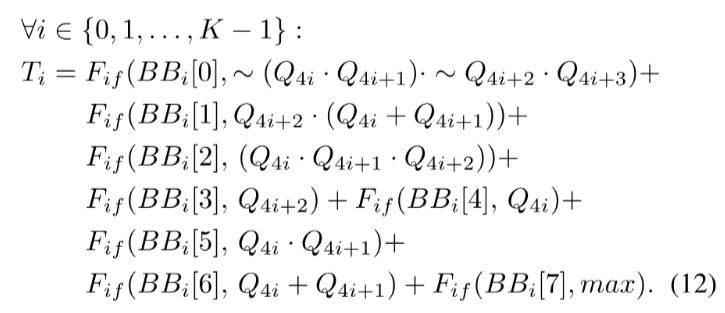

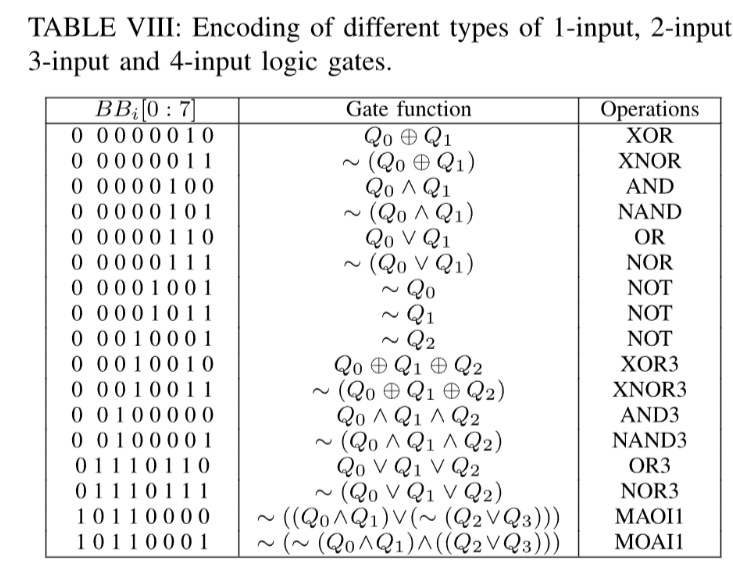

In [1]:
# extract target variables from a result file
result_file_str = "result_gec.txt"
lines = None

# Open the file
with open(result_file_str, "r") as result_file:
    lines = result_file.readlines()

# Initialize an empty dictionary
variables = {}

for line in lines:
    # Only process lines that start with 'ASSERT'
    if line.startswith("ASSERT"):
        # Remove the 'ASSERT( ' and ' );' parts from the line
        line = line.replace("ASSERT( ", "").replace(" );", "")

        # Split the line at the '=' sign
        var, value = line.split(" = ")

        # Remove the newline character from the value
        value = value.strip()

        # Add the variable and its value to the dictionary
        variables[var] = value

print(variables)

{'Cost[0x77]': '0x04', 'Cost[0x76]': '0x06', 'Cost[0x21]': '0x04', 'Cost[0x20]': '0x06', 'Cost[0x13]': '0x0E', 'Cost[0x11]': '0x02', 'Cost[0x09]': '0x02', 'Cost[0x07]': '0x03', 'Cost[0x05]': '0x03', 'Cost[0x04]': '0x04', 'Cost[0x02]': '0x08', 'Cost[0x10]': '0x00', 'Cost[0x08]': '0x00', 'Cost[0x01]': '0x00', 'Cost[0x00]': '0x00', 'Cost[0x03]': '0x06', 'Cost[0x06]': '0x04', 'Cost[0xB0]': '0x08', 'Cost[0x0B]': '0x02', 'Cost[0x0A]': '0x00', 'Cost[0x12]': '0x0E', 'Cost[0xB1]': '0x06', 'Q_23': '0x9655', 'Q_21': '0x5555', 'Q_19': '0x9655', 'B_8': '0xB1', 'Q_17': '0x9655', 'B_6': '0x06', 'Q_15': '0x9655', 'B_4': '0x0B', 'Q_13': '0x9655', 'B_2': '0x0A', 'B_1': '0x12', 'B_0': '0xB1', 'Q_39': '0xCC0F', 'Q_38': '0x3333', 'Q_37': '0xDE5F', 'Q_36': '0xFF00', 'Q_35': '0x5555', 'Q_34': '0x00FF', 'Q_33': '0xDE5F', 'Q_12': '0x0F0F', 'Q_10': '0x5555', 'Q_8': '0x5555', 'B_9': '0xB1', 'Q_31': '0x6F05', 'Q_6': '0x0F0F', 'B_7': '0x03', 'Q_29': '0xC644', 'Q_4': '0x5555', 'Q_16': '0x00FF', 'Q_3': '0x3333', 'Q_

In [2]:
import re

# Initialize empty dictionaries
arrays = {}

# Iterate over each item in the dictionary
for key, value in variables.items():
    # Get the first character of the key
    first_char = key[0]

    # Get the last number in the key using regex
    match = re.search(r"\d+$", key)
    if match:
        last_number = int(match.group())

        # If this character doesn't have an array yet, create it
        if first_char not in arrays:
            arrays[first_char] = {}

        # Add the value to the appropriate array at the position specified by the last number
        arrays[first_char][last_number] = value

# Sort each array by its keys (the last numbers in the original keys)
for key in arrays:
    arrays[key] = [item[1] for item in sorted(arrays[key].items())]

print(arrays)

{'Q': ['0x0F0F', '0x00FF', '0x00FF', '0x3333', '0x5555', '0xCC0F', '0x0F0F', '0xCC0F', '0x5555', '0xCC0F', '0x5555', '0xCC0F', '0x0F0F', '0x9655', '0x00FF', '0x9655', '0x00FF', '0x9655', '0x9655', '0x9655', '0x3333', '0x5555', '0x5555', '0x9655', '0xCC0F', '0x9655', '0x3333', '0x5555', '0x0F0F', '0xC644', '0xDE5F', '0x6F05', '0x3333', '0xDE5F', '0x00FF', '0x5555', '0xFF00', '0xDE5F', '0x3333', '0xCC0F'], 'B': ['0xB1', '0x12', '0x0A', '0xB1', '0x0B', '0xB0', '0x06', '0x03', '0xB1', '0xB1'], 'X': ['0x00FF', '0x0F0F', '0x3333', '0x5555'], 'Y': ['0xDEC0', '0xBA13', '0x6F05', '0x36B4'], 'C': ['0x06', '0x0E', '0x00', '0x06', '0x02', '0x08', '0x04', '0x06', '0x06', '0x06'], 'T': ['0xCC0F', '0x9655', '0x5555', '0x6F05', '0xFF00', '0xC644', '0xDE5F', '0x36B4', '0xBA13', '0xDEC0']}


In [3]:
X = list(arrays["X"])
Y = list(arrays["Y"])
B = list(arrays["B"])
T = list(arrays["T"])
Q = list(arrays["Q"])

BT = {
    "0xB1": "MOAI1",
    "0x12": "XOR3",
    "0x0A": "Q1",
    "0x0B": "NOT0",
    "0xB0": "MAOI1",
    "0x06": "OR",
    "0x03": "XNOR",
}


XS = [f"X{i}" for i in range(0, len(X))]
BS = [BT[b] for b in B]

TS = []
for i in range(0, len(T)):
    q0 = Q[i * 4]
    q1 = Q[i * 4 + 1]
    q2 = Q[i * 4 + 2]
    q3 = Q[i * 4 + 3]
    q0_s = f"X_{{{X.index(q0)}}}" if q0 in X else f"T_{{{T.index(q0)}}}"
    q1_s = f"X_{{{X.index(q1)}}}" if q1 in X else f"T_{{{T.index(q1)}}}"
    q2_s = f"X_{{{X.index(q2)}}}" if q2 in X else f"T_{{{T.index(q2)}}}"
    q3_s = f"X_{{{X.index(q3)}}}" if q3 in X else f"T_{{{T.index(q3)}}}"

    if BS[i] == "MOAI1":
        TS.append(
            f"T_{{{i}}} = MOAI1({q0_s},{q1_s},{q2_s},{q3_s}) "
        )  # why tow backslashes?
    elif BS[i] == "MAOI1":
        TS.append(f"T_{{{i}}} = MAOI1({q0_s},{q1_s},{q2_s},{q3_s}) ")
    elif BS[i] == "XOR3":
        TS.append(f"T_{{{i}}} = XOR3({q0_s},{q1_s},{q2_s}) ")
    elif BS[i] == "Q1":
        TS.append(f"T_{{{i}}} = {q1_s} ")
    elif BS[i] == "NOT0":
        TS.append(f"T_{{{i}}} = NOT({q0_s}) ")
    elif BS[i] == "OR":
        TS.append(f"T_{{{i}}} =  OR({q0_s},{q1_s}) ")
    elif BS[i] == "XNOR":
        TS.append(f"T_{{{i}}} =  XNOR({q0_s},{q1_s}) ")

YS = []
for i in range(0, len(Y)):
    y = Y[i]
    if y in T:
        YS.append(f"Y_{{{i}}} = T_{{{T.index(y)}}}")

latex = "\n".join(TS + YS)
print(latex)

T_{0} = MOAI1(X_{1},X_{0},X_{0},X_{2}) 
T_{1} = XOR3(X_{3},T_{0},X_{1}) 
T_{2} = T_{0} 
T_{3} = MOAI1(X_{1},T_{1},X_{0},T_{1}) 
T_{4} = NOT(X_{0}) 
T_{5} = MAOI1(X_{2},X_{3},X_{3},T_{1}) 
T_{6} =  OR(T_{0},T_{1}) 
T_{7} =  XNOR(X_{1},T_{5}) 
T_{8} = MOAI1(X_{2},T_{6},X_{0},X_{3}) 
T_{9} = MOAI1(T_{4},T_{6},X_{2},T_{0}) 
Y_{0} = T_{9}
Y_{1} = T_{8}
Y_{2} = T_{3}
Y_{3} = T_{7}


$$
\begin{equation}
\begin{split}
T_{0} = MOAI1(X_{1},X_{0},X_{0},X_{2}) \\
T_{1} = XOR3(X_{3},T_{0},X_{1}) \\
T_{2} = T_{0} \\
T_{3} = MOAI1(X_{1},T_{1},X_{0},T_{1}) \\
T_{4} = NOT(T_{1}) \\
T_{5} = MAOI1(X_{2},X_{3},X_{3},T_{1}) \\
T_{6} =  OR(T_{0},T_{1}) \\
T_{7} =  XNOR(X_{1},T_{5}) \\
T_{8} = MOAI1(X_{2},T_{6},X_{0},X_{3}) \\
T_{9} = MOAI1(T_{4},T_{6},X_{2},T_{0}) \\
Y_{0} = T_{9} \\
Y_{1} = T_{8} \\
Y_{2} = T_{3} \\
Y_{3} = T_{7}
\end{split}
\end{equation}
$$